In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [462]:
class TS:
    '''
    Class that implements the various time series analysis methods as given in FAS and kendall.
    '''
    def __init__(self, data_loc):
        '''
        Initializes object with a dataset. Index gets changed to datetime type too. 
        '''
        data = pd.read_csv(data_loc)
        data.set_index('dt', inplace= True)
        data.index = pd.to_datetime(data.index)
        self.data = data
    
    def set_start_end(self, start, end=None):
        '''
        If lots of operations are being done to a subset of data, this method can be used to build a subset of data that 
        can be operated on. Using subset = True in following methods will allow class to use this subset dataset.
        '''
        if end:
            self.sub = self.data.loc[end:start]
        else:
            self.sub = self.data.loc[:start]
        
    def plot_data(self, col, start = None, end = None, figsize = (12,6), subset = False):
        '''
        Plot the data for a particular column(s) with index(datetime) on x-axis.
        '''
        if subset:
            sub = self.sub[col]
        else:
            if end:
                sub = self.data[col].loc[end:start]
            else:
                sub = self.data[col].loc[:start]
        fig, ax = plt.subplots(1,1, figsize = figsize)
        sub.plot(ax = ax)
    
    def trend(self, col, method, subset = False):
        '''
        Use different methods for trend analysis to get values of trend. Note: Should ideally use matrix methods to solve these 
        equations.

        '''
        if subset:
            data = self.sub.sort_index()
        else:
            data = self.data.sort_index()
        
        data['t'] = data.time - data.time.median()
        data = data[[col, 't']]
        
        sigma_y_t = np.dot(data.t, data[col])
        y_bar = data[col].mean()
        t_bar = data.t.mean()
        n = data.shape[0]
        sigma_y_square = np.sum(np.square(data[col]))
        sigma_t_square = np.sum(np.square(data.t))
        
        if method == 'straight line':
            b = (sigma_y_t - n*y_bar*t_bar)/(sigma_t_square - n*(t_bar)**2)
            a = y_bar - b*t_bar
            
            data['trend'] = a + b*data.t
            self.data['straight_line_trend'] = data['trend'] 
            if subset:
                self.sub['straight_line_trend'] = data['trend']
                
        elif method == 'parabolic':
            sigma_y_t_square = np.dot(np.square(data.t), data[col])
            sigma_t_four = np.sum(data.t**4)
            sigma_t_cube = np.sum(data.t**3)
            
            mini_denom = sigma_t_square-n*t_bar**2
            num = sigma_y_t_square - y_bar*sigma_t_square + (n*t_bar*y_bar-sigma_y_t)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
            denom = (-1*sigma_t_square**2)/n + sigma_t_four - (-t_bar*sigma_t_square + sigma_t_cube)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
            c = num/denom
            b = (sigma_y_t-n*y_bar*t_bar-c*(-t_bar*sigma_t_square+sigma_t_cube))/mini_denom
            a = y_bar - t_bar - c*sigma_t_square/n
            
            data['trend'] = a + b*data.t + c*data.t**2
            self.data['parabolic_trend'] = data['trend'] 
            if subset:
                self.sub['parabolic_trend'] = data['trend']

In [463]:
# loading data
ltc = TS(data_loc='../Desktop/TS/ltc.csv')

In [468]:
# making a subset of data to work on 
ltc.set_start_end(start = '2018', end= '2018')

In [469]:
# calculating trend values
trends = ['straight line', 'parabolic']
for i in trends :
    ltc.trend(col = 'open', method = i, subset = True)

C:\Users\Ishan Nangia\anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ishan Nangia\anaconda3\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [473]:
# checking new dataframe
ltc.sub.head()

,close,high,low,open,time,volumefrom,volumeto,year,straight_line_trend,parabolic_trend
dt,,,,,,,,,,
2018-12-31 23:00:00+00:00,30.13,30.27,30.00,30.00,1546297200,8639.67,259038.95,2018,6.111230,29.352019
2018-12-31 22:00:00+00:00,30.00,30.05,29.78,29.84,1546293600,20197.36,600043.65,2018,6.133917,29.358786
2018-12-31 21:00:00+00:00,29.84,30.26,29.78,30.25,1546290000,18986.06,566425.91,2018,6.156603,29.365557
2018-12-31 20:00:00+00:00,30.25,30.29,30.05,30.25,1546286400,17627.24,529284.95,2018,6.179290,29.372331
2018-12-31 19:00:00+00:00,30.25,30.83,29.95,30.79,1546282800,58674.46,1782461.93,2018,6.201977,29.379108


C:\Users\Ishan Nangia\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


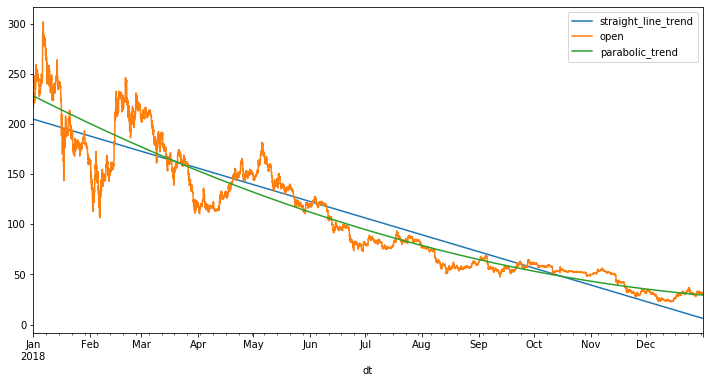

In [472]:
# plotting trend valueswith actual values
ltc.plot_data(col=['straight_line_trend','open', 'parabolic_trend'], subset =True)

ROUGH

In [437]:
def del_this(data, col):
    
    sigma_y_t = np.dot(data.t, data[col])
    y_bar = data[col].mean()
    t_bar = data.t.mean()
    n = data.shape[0]
    sigma_y_square = np.sum(np.square(data[col]))
    sigma_t_square = np.sum(np.square(data.t))
    
#     sigma_y_t_square = np.dot(np.square(data.t), data[col])
#     sigma_t_four = np.sum(data.t**4)
#     sigma_t_cube = np.sum(data.t**3)

#     mini_denom = sigma_t_square-n*t_bar**2
#     num = sigma_y_t_square - y_bar*sigma_t_square + (n*t_bar*y_bar-sigma_y_t)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
#     denom = (-1*sigma_t_square**2)/n + sigma_t_four - (-t_bar*sigma_t_square + sigma_t_cube)*(sigma_t_cube-t_bar*sigma_t_square)/mini_denom
#     c = num/denom
#     b = (sigma_y_t-n*y_bar*t_bar-c*(-t_bar*sigma_t_square+sigma_t_cube))/mini_denom
#     a = y_bar - t_bar - c*sigma_t_square/n

#     data['trend'] = a + b*data.t + c*data.t**2

    b = (sigma_y_t - n*y_bar*t_bar)/(sigma_t_square - n*(t_bar)**2)
    a = y_bar - b*t_bar
            
    data['trend'] = a + b*data.t

In [438]:
del_data = pd.DataFrame({'year':range(1990,2001,1),'y':[17,20,19,26,24,40,35,55,51,74,79]})

In [449]:
del_data['t'] = del_data['year'] 

In [450]:
del_this(del_data, 'y')

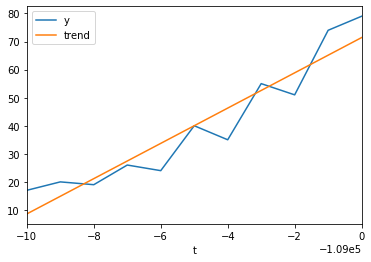

In [451]:
del_data.plot(x = 't', y = ['y','trend'])